# **Day 4/5**: Python Training

The objective of this notebook is to cover some important concepts which we came across during our day 4 of the python training session. In this notebook, we will quickly cover few important concepts mostly around the 4 mostly used modules for data science related projects in python namely - pandas, numpy, matplotlib, plotly

Refer to the outline of this notebook below to browse through different sections of this notebook.  

## **Table of Contents**  
* [Pandas](#pandas)  
    * [Pandas Installation](#pandas-installation)  
    * [Pandas Usage](#pandas-usage)  
        * [Pandas Object Creation](#pandas-object-creation)  
        * [Pandas Viewing Data](#pandas-viewing-data)  
        * [Pandas Selection](#pandas-selection)  
        * [Pandas Missing Data](#pandas-missing-data)  
        * [Pandas Operations](#pandas-operations)  
        * [Pandas Merge](#pandas-merge)  
        * [Pandas Grouping](#pandas-grouping)  
        * [Pandas Reshaping](#pandas-reshaping)
        * [Pandas Categoricals](#pandas-categoricals)
        * [Pandas Plotting](#pandas-plotting)
* [Numpy](#numpy)  
    * [Numpy Installation](#numpy-installation)  
    * [Numpy Usage](#numpy-usage)  
        * [Numpy Array Creation](#numpy-array-creation)  
        * [Numpy Printing Array](#numpy-printing-array)  
        * [Numpy Operations](#numpy-operations)  
        * [Numpy Universal Functions](#numpy-universal-functions)
        * [Numpy Plotting](#numpy-plotting)
* [Matplotlib](#matplotlib)
    * [Matplotlib Installation](#matplotlib-installation)  
    * [Matplotlib Usage](#matplotlib-usage)
* [Plotly](#plotly)
    * [Plotly Installation](#plotly-installation)  
    * [Plotly Usage](#plotly-usage)

## **Pandas**

[Back to contents](#table-of-contents)

### Pandas Installation

In [1]:
!pip install pandas==1.5.3


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas Usage  

10 minutes to Pandas Official Link - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf)  
Pandas Cookbook - [Link](https://pandas.pydata.org/pandas-docs/version/1.4/pandas.pdf#page=1001&zoom=100,96,657)

In [2]:
import pandas as pd
import numpy as np

#### Pandas Object Creation   

[Back to contents](#table-of-contents)

In [3]:
"""
Pandas have 2 data structures - 1. Series, and 2. Dataframes
Series are 1 dimensional datastruture capable of holding any data type (integers, strings, floats, etc)
Dataframes are 2 dimensional datastructure with columns of potentially different data types or dict of Series objects.
"""
 
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Dataframe with same data type
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.499000,2.377788,1.970015,-0.455583
2013-01-02,0.486693,0.402634,1.459441,-0.311337
2013-01-03,-0.447066,0.456833,-0.087046,0.738190
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459
2013-01-05,1.082417,2.028415,-1.976092,-0.239427
2013-01-06,0.087164,1.997772,1.875364,1.065692


In [6]:
# Dataframe with different data types
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Extracting data types for each column of dataframe
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Pandas Viewing Data

[Back to contents](#table-of-contents)

In [8]:
# Viewing first 5 rows of the dataframe
df.head()

,A,B,C,D
2013-01-01,-1.499000,2.377788,1.970015,-0.455583
2013-01-02,0.486693,0.402634,1.459441,-0.311337
2013-01-03,-0.447066,0.456833,-0.087046,0.738190
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459
2013-01-05,1.082417,2.028415,-1.976092,-0.239427


In [9]:
# Viewing last 5 rows of the dataframe
df.tail()

,A,B,C,D
2013-01-02,0.486693,0.402634,1.459441,-0.311337
2013-01-03,-0.447066,0.456833,-0.087046,0.738190
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459
2013-01-05,1.082417,2.028415,-1.976092,-0.239427
2013-01-06,0.087164,1.997772,1.875364,1.065692


In [10]:
# Viewing indexes for the dataframe
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
# Viewing columns of the dataframe
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# Converting dataframe to numpy array
df.to_numpy()

array([[-1.49900028,  2.3777878 ,  1.97001455, -0.45558332],
       [ 0.48669256,  0.40263374,  1.45944107, -0.3113374 ],
       [-0.44706576,  0.45683291, -0.08704553,  0.73818995],
       [-2.00855275, -1.82366627, -0.07446377,  2.33045851],
       [ 1.08241676,  2.02841482, -1.97609183, -0.23942719],
       [ 0.08716428,  1.99777212,  1.87536397,  1.06569181]])

In [13]:
# Extracting Statistics for each column of the dataframe
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.383058,0.906629,0.527870,0.521332
std,1.184639,1.582665,1.534542,1.080995
min,-2.008553,-1.823666,-1.976092,-0.455583
25%,-1.236017,0.416184,-0.083900,-0.293360
50%,-0.179951,1.227303,0.692489,0.249381
75%,0.386810,2.020754,1.771383,0.983816
max,1.082417,2.377788,1.970015,2.330459


In [14]:
# Transposing a dataframe
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.499000,0.486693,-0.447066,-2.008553,1.082417,0.087164
B,2.377788,0.402634,0.456833,-1.823666,2.028415,1.997772
C,1.970015,1.459441,-0.087046,-0.074464,-1.976092,1.875364
D,-0.455583,-0.311337,0.738190,2.330459,-0.239427,1.065692


In [15]:
# Sorting a dataframe by index values
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.455583,1.970015,2.377788,-1.499000
2013-01-02,-0.311337,1.459441,0.402634,0.486693
2013-01-03,0.738190,-0.087046,0.456833,-0.447066
2013-01-04,2.330459,-0.074464,-1.823666,-2.008553
2013-01-05,-0.239427,-1.976092,2.028415,1.082417
2013-01-06,1.065692,1.875364,1.997772,0.087164


In [16]:
# Sorting a dataframe by column values
df.sort_values(by="B")

,A,B,C,D
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459
2013-01-02,0.486693,0.402634,1.459441,-0.311337
2013-01-03,-0.447066,0.456833,-0.087046,0.738190
2013-01-06,0.087164,1.997772,1.875364,1.065692
2013-01-05,1.082417,2.028415,-1.976092,-0.239427
2013-01-01,-1.499000,2.377788,1.970015,-0.455583


#### Pandas Selection

[Back to contents](#table-of-contents)

In [17]:
# Selecting a specific column by label name
df['A']

2013-01-01   -1.499000
2013-01-02    0.486693
2013-01-03   -0.447066
2013-01-04   -2.008553
2013-01-05    1.082417
2013-01-06    0.087164
Freq: D, Name: A, dtype: float64

In [18]:
# Selecting dataframe rows by indexes
df[3:5]

,A,B,C,D
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459
2013-01-05,1.082417,2.028415,-1.976092,-0.239427


In [19]:
# Selecting dataframe rows by index value
df.loc[dates[0]]

A   -1.499000
B    2.377788
C    1.970015
D   -0.455583
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
# Selecting dataframe rows by row and column indices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.008553,-1.823666
2013-01-05,1.082417,2.028415


In [21]:
# Selecting dataframe rows by row and column indices in list format
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.486693,1.459441
2013-01-03,-0.447066,-0.087046
2013-01-05,1.082417,-1.976092


In [22]:
# Selecting a specific cell value
df.iloc[1, 1]

0.40263374219028

In [23]:
# Selecting dataframe rows by boolean / conditional indexing
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.486693,0.402634,1.459441,-0.311337
2013-01-05,1.082417,2.028415,-1.976092,-0.239427
2013-01-06,0.087164,1.997772,1.875364,1.065692


In [24]:
# Selecting dataframe values which are greater than zero and eliminating others by replacing
# them with NaN values
df[df > 0]

,A,B,C,D
2013-01-01,NaN,2.377788,1.970015,NaN
2013-01-02,0.486693,0.402634,1.459441,NaN
2013-01-03,NaN,0.456833,NaN,0.738190
2013-01-04,NaN,NaN,NaN,2.330459
2013-01-05,1.082417,2.028415,NaN,NaN
2013-01-06,0.087164,1.997772,1.875364,1.065692


In [25]:
# Selecting specific dataframe rows by specific column values
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.447066,0.456833,-0.087046,0.738190,two
2013-01-05,1.082417,2.028415,-1.976092,-0.239427,four


#### Pandas Missing Data

[Back to contents](#table-of-contents)

In [26]:
# Adding one extra column with NaN values
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,E
2013-01-01,-1.499000,2.377788,1.970015,-0.455583,NaN
2013-01-02,0.486693,0.402634,1.459441,-0.311337,NaN
2013-01-03,-0.447066,0.456833,-0.087046,0.738190,NaN
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459,NaN


In [27]:
# Replacing two row indices for new column with some value
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-1.499000,2.377788,1.970015,-0.455583,1.0
2013-01-02,0.486693,0.402634,1.459441,-0.311337,1.0
2013-01-03,-0.447066,0.456833,-0.087046,0.738190,NaN
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459,NaN


In [28]:
# Dropping dataframe rows with NaN values in E column
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-1.499000,2.377788,1.970015,-0.455583,1.0
2013-01-02,0.486693,0.402634,1.459441,-0.311337,1.0


In [29]:
# Filling NaN values with 5 value for E column
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-1.499000,2.377788,1.970015,-0.455583,1.0
2013-01-02,0.486693,0.402634,1.459441,-0.311337,1.0
2013-01-03,-0.447066,0.456833,-0.087046,0.738190,5.0
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459,5.0


In [30]:
# Getting positions in dataframe have values == NaN
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


#### Pandas Operations

[Back to contents](#table-of-contents)

In [31]:
# Extracting mean values for all columns in the dataframe
df.mean()

A   -0.383058
B    0.906629
C    0.527870
D    0.521332
dtype: float64

In [32]:
# Squaring one specific column of dataframe using lambda function 
df['C_squared'] = df['C'].apply(lambda x: x*x)
df

,A,B,C,D,C_squared
2013-01-01,-1.499000,2.377788,1.970015,-0.455583,3.880957
2013-01-02,0.486693,0.402634,1.459441,-0.311337,2.129968
2013-01-03,-0.447066,0.456833,-0.087046,0.738190,0.007577
2013-01-04,-2.008553,-1.823666,-0.074464,2.330459,0.005545
2013-01-05,1.082417,2.028415,-1.976092,-0.239427,3.904939
2013-01-06,0.087164,1.997772,1.875364,1.065692,3.516990


In [33]:
# Creating pandas series with string data types
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [34]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### Pandas Merge

[Back to contents](#table-of-contents)

In [35]:
# Generating pandas dataframe for breaking down into fragments
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.861318,-0.648173,0.764033,0.543841
1,1.203438,0.513500,-0.119870,-0.071765
2,2.509321,1.009537,-0.126028,0.232580
3,-1.556020,0.733406,1.197093,-1.185140
4,-0.712718,0.613259,-1.367812,0.600063
5,-0.541568,0.236055,-0.299052,1.348056
6,0.046961,-1.820588,-0.903499,-0.407759
7,0.488800,0.810683,-0.244799,-1.021636
8,2.479446,1.536714,-2.037945,1.356054
9,-0.479797,-0.988738,0.732451,1.033524


In [36]:
# Breaking down above dataframe into list of dataframes
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.861318 -0.648173  0.764033  0.543841
 1  1.203438  0.513500 -0.119870 -0.071765
 2  2.509321  1.009537 -0.126028  0.232580,
           0         1         2         3
 3 -1.556020  0.733406  1.197093 -1.185140
 4 -0.712718  0.613259 -1.367812  0.600063
 5 -0.541568  0.236055 -0.299052  1.348056
 6  0.046961 -1.820588 -0.903499 -0.407759,
           0         1         2         3
 7  0.488800  0.810683 -0.244799 -1.021636
 8  2.479446  1.536714 -2.037945  1.356054
 9 -0.479797 -0.988738  0.732451  1.033524]

In [37]:
# Generating 2 dummy datframes to merge together
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print('\n')
print(right)

   key  lval
0  foo     1
1  foo     2


   key  rval
0  foo     4
1  foo     5


In [38]:
# Performing left join for left dataframe with right dataframe and on column name = 'key'
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Pandas Grouping

[Back to contents](#table-of-contents)

In [39]:
# Generating a dataframe to perform grouping 
df = pd.DataFrame(
    {
    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
    "C": np.random.randn(8),
    "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.705154,-2.923072
1,bar,one,-0.685009,1.250077
2,foo,two,-1.425928,1.105434
3,bar,three,0.311786,-0.329474
4,foo,two,0.525520,-0.091838
5,bar,two,-1.783635,-0.324521
6,foo,one,0.417039,-0.769576
7,foo,three,0.058472,1.231666


In [40]:
# Grouping a dataframe and performing aggregations
df.groupby(by='A').agg({'C':'sum', 'D':'mean'})

,C,D
A,,
bar,-2.156857,0.198694
foo,-1.130050,-0.289477


#### Pandas Reshaping

[Back to contents](#table-of-contents)

In [41]:
tuples = list(
    zip(
    *[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
    ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [42]:
# Generating a multindex dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.610663 -0.223766
      two     1.700749 -1.148004
baz   one     2.190566  0.581526
      two    -0.300392  0.435536
foo   one    -0.298647  0.191392
      two     1.168156  0.780651
qux   one    -0.062526  0.219421
      two    -0.434193 -0.753242

In [43]:
# Stacking a dataframe based on column names
df2 = df[:4]
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.610663
               B   -0.223766
       two     A    1.700749
               B   -1.148004
baz    one     A    2.190566
               B    0.581526
       two     A   -0.300392
               B    0.435536
dtype: float64

In [44]:
# Unstacking a stacked dataframe
stacked.unstack()

A         B
first second                    
bar   one    -0.610663 -0.223766
      two     1.700749 -1.148004
baz   one     2.190566  0.581526
      two    -0.300392  0.435536

In [45]:
# Unstacking a dataframe based on second index
stacked.unstack(1)

second        one       two
first                      
bar   A -0.610663  1.700749
      B -0.223766 -1.148004
baz   A  2.190566 -0.300392
      B  0.581526  0.435536

In [46]:
# Unstacking a dataframe based on first index
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.610663  2.190566
       B -0.223766  0.581526
two    A  1.700749 -0.300392
       B -1.148004  0.435536

In [47]:
# Generating a pandas dataframe for pivotting
df = pd.DataFrame(
    {
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
    "D": np.random.randn(12),
    "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.683286,-0.338191
1,one,B,foo,-0.630777,-0.933233
2,two,C,foo,-0.797837,1.056413
3,three,A,bar,-0.077436,-0.934255
4,one,B,bar,1.002741,1.256905
5,one,C,bar,1.616215,0.471414
6,two,A,foo,1.493472,-1.045788
7,three,B,foo,1.526107,1.484929
8,one,C,foo,-0.540818,2.093055
9,one,A,bar,-0.256399,-0.593049


In [48]:
# Performing pivot on the generated dataframe
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.256399  0.683286
      B  1.002741 -0.630777
      C  1.616215 -0.540818
three A -0.077436       NaN
      B       NaN  1.526107
      C -0.222305       NaN
two   A       NaN  1.493472
      B  0.023037       NaN
      C       NaN -0.797837

#### Pandas Categoricals

[Back to contents](#table-of-contents)

In [49]:
# Generating a datframe to convert data tye into categorical type
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Pandas Plotting

[Back to contents](#table-of-contents)

In [51]:
# Generating a time series dataframe for plotting the cumulative sum
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000",periods=1000))
ts = ts.cumsum()
ts

2000-01-01     2.258319
2000-01-02     3.588284
2000-01-03     5.942626
2000-01-04     6.355508
2000-01-05     5.359238
                ...    
2002-09-22   -15.190741
2002-09-23   -14.985380
2002-09-24   -14.190168
2002-09-25   -13.345974
2002-09-26   -15.037711
Freq: D, Length: 1000, dtype: float64

<AxesSubplot: >

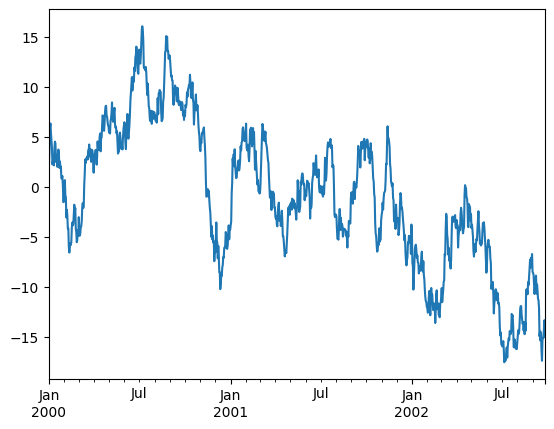

In [52]:
ts.plot()

In [53]:
# Generating a time series dataframe with multiple column labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,0.324754,-0.603478,-0.795692,-0.593381
2000-01-02,-2.514369,-0.644407,0.825764,-0.615285
2000-01-03,-1.066602,-2.351755,1.834138,0.157403
2000-01-04,-0.098763,-1.901093,0.351923,-0.789596
2000-01-05,-1.085744,1.761335,-0.690283,-0.109172
...,...,...,...,...
2002-09-22,0.189406,-0.896555,-2.190958,0.810979
2002-09-23,-0.529527,0.219422,-0.709439,1.090281
2002-09-24,-0.095981,-0.154238,-0.319770,-0.594382
2002-09-25,-0.179887,0.378682,-0.775813,-0.309391


In [54]:
df = df.cumsum()

<AxesSubplot: title={'center': 'sales_data_plot'}, xlabel='date_range', ylabel='sales'>

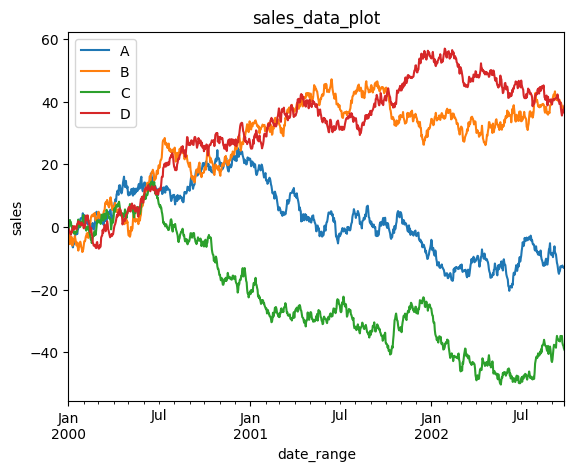

In [55]:
df.plot(xlabel='date_range', ylabel='sales', title='sales_data_plot')

## **Numpy**

[Back to contents](#table-of-contents)

### Numpy Installation

In [56]:
pip install numpy==1.24.1


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Numpy Usage  

* **Array Creation:**  
    arange, array, copy, empty, empty_like, eye, fromfile, fromfunction,
    identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like  
* **Conversions:**  
    ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat
* **Manipulations:**  
    array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit,
    hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes,
    take, transpose, vsplit, vstack  
* **Questions:**  
    all, any, nonzero, where  
* **Ordering:**  
    argmax, argmin, argsort, max, min, ptp, searchsorted, sort  
* **Operations:**  
    choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask,
    real, sum  
* **Basic Statistics:**  
    cov, mean, std, var  
* **Basic Linear Algebra:**  
    cross, dot, outer, linalg.svd, vdot


In [57]:
import numpy as np

#### Numpy Array Creation  

[Back to contents](#table-of-contents)

In [58]:
# Generating a numpy array from list of elements
a = np.array([2,3,4])
a

array([2, 3, 4])

In [59]:
# Checking the data type in the numpy array
a.dtype

dtype('int32')

In [60]:
# Generating a numpy array with floating nos data type
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

In [61]:
# Generating a numpy array with complex nos data type
c = np.array([[1,2], [3,4]], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [62]:
# Generating a 2D - zero filled array of the 3 rows and 4 columns
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
# Generating a 3D - 1 filled array of the 3 rows and 4 columns
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [64]:
# Generating numpy array with numbers between 0 and 2 for 9 numbers in total
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Numpy Printing Array

[Back to contents](#table-of-contents)

In [65]:
# Generating a 1D array
a = np.arange(6) 
print(a)

print('\n')

# Generating a 2D array
b = np.arange(12).reshape(4,3)
print(b)

print('\n')

# Generating a 3D array
c = np.arange(24).reshape(2,3,4) 
print(c)

[0 1 2 3 4 5]


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Numpy Operations

[Back to contents](#table-of-contents)

In [66]:
# All arithmetic operations occur in numpy arrays at element level
a = np.array([20,30,40,50])
b = np.arange(4)

c = a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<30)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True False False False]


In [67]:
# Matrix level opeartions for 2 numpy arrays
A = np.array([[1,1],[0,1]])
B = np.array([[2,0],[3,4]])

print(A*B) # Element wise multiplication of 2 arrays
print(A@B) # Matrix multiplication of 2 arrays
print(A.dot(B)) # Dot product of 2 arrays

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


In [68]:
# Other array operations
a = np.random.random((2,3))

print(a.sum())
print(a.min())
print(a.max())

3.1738438139530474
0.2747850591866954
0.9612195509511442


In [69]:
# Sum of each column
print(a.sum(axis=0))

# Min of each row
print(a.min(axis=1))

# Cumulative sum along each row
print(a.cumsum(axis=1))

[1.34125071 0.89743091 0.9351622 ]
[0.45435532 0.27478506]
[[0.96121955 1.5838654  2.03822072]
 [0.38003116 0.65481622 1.13562309]]


#### Numpy Universal Functions  

List of functions:  
**all, any, apply_along_axis, argmax, argmin, argsort, average, bincount, ceil, clip, conj,
corrcoef, cov, cross, cumprod, cumsum, diff, dot, floor, inner, inv, lexsort, max, maximum,
mean, median, min, minimum, nonzero, outer, prod, re, round, sort, std, sum, trace, transpose,
var, vdot, vectorize, where**

[Back to contents](#table-of-contents)

In [70]:
A = np.arange(3)
A

array([0, 1, 2])

In [71]:
# Perform exponential for each element in the array
np.exp(A)

array([1.        , 2.71828183, 7.3890561 ])

In [72]:
# Perform sq root for each element in the array
np.sqrt(A)

array([0.        , 1.        , 1.41421356])

In [73]:
C = np.array([2., -1., 4.])
np.add(A, C)

array([2., 0., 6.])

#### Numpy Indexing, Slicing & Iterating

[Back to contents](#table-of-contents)

In [74]:
# Generating a numpy array where each element if cubed again
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [75]:
print(a[2]) # Getting an element in specific index
print(a[2:5]) # Getting a sub array by using index range
a[0:6:2] = 10000 # Replacing array values at 0, 2, 4 places to 10000
print(a)

8
[ 8 27 64]
[10000     1 10000    27 10000   125   216   343   512   729]


In [76]:
# Looping across elements in an array
for element in np.arange(10):
    print(element)

0
1
2
3
4
5
6
7
8
9


#### Numpy Shape Manipulation

[Back to contents](#table-of-contents)

In [77]:
# Generating a random array for shape manipulation
a = np.floor(10*np.random.random((3,4)))
a

array([[0., 3., 1., 7.],
       [0., 5., 1., 6.],
       [2., 2., 9., 1.]])

In [78]:
print(a.shape) # Prints the shape of the array i.e. no of rows, no  of columns (dimensions)
print(a.ravel()) # Prints the flattened array
print(a.reshape(6,2)) # Reshapes the array to newer dimensions
print(a.T) # Transposing an array
a.resize((6,2)) # Resize and Reshape are same but resize modifies the array permanently
print(a)

(3, 4)
[0. 3. 1. 7. 0. 5. 1. 6. 2. 2. 9. 1.]
[[0. 3.]
 [1. 7.]
 [0. 5.]
 [1. 6.]
 [2. 2.]
 [9. 1.]]
[[0. 0. 2.]
 [3. 5. 2.]
 [1. 1. 9.]
 [7. 6. 1.]]
[[0. 3.]
 [1. 7.]
 [0. 5.]
 [1. 6.]
 [2. 2.]
 [9. 1.]]


In [79]:
# Array Stacking (Vertical and Horizontal Stacking)
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[4. 9.]
 [1. 4.]]
[[1. 3.]
 [5. 8.]]


In [80]:
print(np.vstack((a,b))) # Vertical Stack one array on another
print(np.hstack((a,b))) # Horizontal Stack one array on another

[[4. 9.]
 [1. 4.]
 [1. 3.]
 [5. 8.]]
[[4. 9. 1. 3.]
 [1. 4. 5. 8.]]


In [81]:
# Array Splitting (Vertical and Horizontal Splitting)
a = np.floor(10*np.random.random((2,12)))
a

array([[5., 7., 5., 3., 2., 6., 6., 5., 5., 9., 3., 6.],
       [0., 1., 4., 3., 4., 2., 9., 8., 7., 1., 0., 2.]])

In [82]:
print(np.hsplit(a,3)) # Splitting into multiple vertical arrays

[array([[5., 7., 5., 3.],
       [0., 1., 4., 3.]]), array([[2., 6., 6., 5.],
       [4., 2., 9., 8.]]), array([[5., 9., 3., 6.],
       [7., 1., 0., 2.]])]


#### Numpy Plotting  

[Back to contents](#table-of-contents)

In [83]:
import matplotlib.pyplot as plt

In [84]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x  = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2 # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i # note when
        z[diverge] = 2 # avoid diverging too much

    return divtime

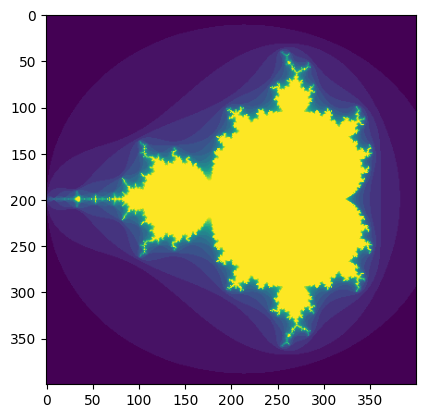

In [85]:
plt.imshow(mandelbrot(400,400))
plt.show()

## **Matplotlib**

[Back to contents](#table-of-contents)

### Matplotlib Installation

### Matplotlib Usage

## **Plotly**

[Back to contents](#table-of-contents)

### Plotly Installation

### Plotly Usage